In [27]:
import config
import stats
from simulate import simulate
import random

def reset_statistics():
    stats.delays_type1.clear()
    stats.delays_type2.clear()
    stats.waiting_times_type1.clear()
    stats.waiting_times_type2.clear()
    stats.area_num_in_queue_type1 = 0.0
    stats.area_num_in_queue_type2 = 0.0
    stats.area_num_in_system_type1 = 0.0
    stats.area_num_in_system_type2 = 0.0

def run_simulation(n=100, serversA=2, serversB=1):
    results = []

    for seed in range(n):
        config.NUM_SERVERS_A = serversA
        config.NUM_SERVERS_B = serversB
        random.seed(seed)
        reset_statistics()
        simulate()
        results.append({
            "delay1": sum(stats.delays_type1) / len(stats.delays_type1) if stats.delays_type1 else 0,
            "delay2": sum(stats.delays_type2) / len(stats.delays_type2) if stats.delays_type2 else 0
        })

    return results

## Comparação: 2A+1B vs. 3A+1B vs. 2A+2B

In [28]:
result_2A1B = run_simulation()
result_3A1B = run_simulation(serversA=3, serversB=1)
result_2A2B = run_simulation(serversA=2, serversB=2)


---------------------------- Simulation Report ----------------------------
Steady-state average delay - Type 1: 0h 0m 20s, Type 2: 0h 0m 34s
Steady-state average waiting time - Type 1: 0h 1m 18s, Type 2: 0h 1m 10s
Steady-state average number in queue - Type 1: 0.02, Type 2: 0.02
Steady-state average number in system - Type 1: 0.67, Type 2: 0.15

Server utilization:
	Server A1 - Type 1: 38.12%, Type 2: 7.73%
	Server A2 - Type 1: 20.54%, Type 2: 4.65%
	Server B1 - Type 1: 5.96%, Type 2: 12.38%
---------------------------------------------------------------------------


---------------------------- Simulation Report ----------------------------
Steady-state average delay - Type 1: 0h 0m 21s, Type 2: 0h 0m 24s
Steady-state average waiting time - Type 1: 0h 1m 11s, Type 2: 0h 0m 59s
Steady-state average number in queue - Type 1: 0.02, Type 2: 0.02
Steady-state average number in system - Type 1: 0.60, Type 2: 0.14

Server utilization:
	Server A1 - Type 1: 35.43%, Type 2: 8.35%
	Server A2 

## Comparação visual dos delays médios

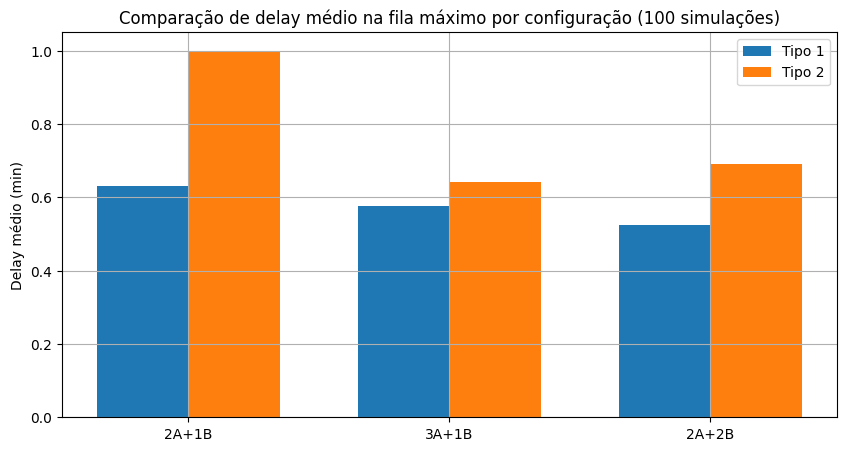

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Extrair média de delays tipo 1 e tipo 2 por configuração
mean_delay1_2A1B = np.max([r["delay1"] for r in result_2A1B])
mean_delay1_3A1B = np.max([r["delay1"] for r in result_3A1B])
mean_delay1_2A2B = np.max([r["delay1"] for r in result_2A2B])

mean_delay2_2A1B = np.max([r["delay2"] for r in result_2A1B])
mean_delay2_3A1B = np.max([r["delay2"] for r in result_3A1B])
mean_delay2_2A2B = np.max([r["delay2"] for r in result_2A2B])

# Gráfico
labels = ["2A+1B", "3A+1B", "2A+2B"]
delays1 = [mean_delay1_2A1B, mean_delay1_3A1B, mean_delay1_2A2B]
delays2 = [mean_delay2_2A1B, mean_delay2_3A1B, mean_delay2_2A2B]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, delays1, width, label="Tipo 1")
plt.bar(x + width/2, delays2, width, label="Tipo 2")

plt.xticks(x, labels)
plt.ylabel("Delay médio (min)")
plt.title("Comparação de delay médio na fila máximo por configuração (100 simulações)")
plt.legend()
plt.grid(True)
plt.show()